In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier

import lightgbm as lgb

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [2]:
filepath = r'C://users/casti/OneDrive/Documents/Coding Projects/Fraud Detection Model/data/raw/creditcard.csv'

df = pd.read_csv(filepath)

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df[['Time','Amount']].describe()

Time         Amount
count  284807.000000  284807.000000
mean    94813.859575      88.349619
std     47488.145955     250.120109
min         0.000000       0.000000
25%     54201.500000       5.600000
50%     84692.000000      22.000000
75%    139320.500000      77.165000
max    172792.000000   25691.160000

In [6]:
df.shape

(284807, 31)

In [7]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

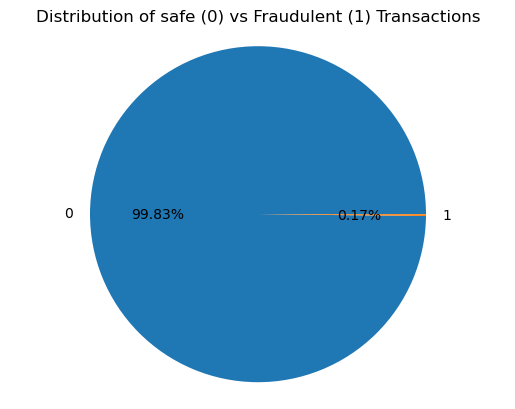

In [8]:
explode = [0 if cls == 0 else 0 for cls in df['Class'].unique()]

plt.pie(df['Class'].value_counts(), labels=df['Class'].value_counts().index, autopct='%1.2f%%', explode=explode)
plt.axis('equal')
plt.title('Distribution of safe (0) vs Fraudulent (1) Transactions')
plt.show()

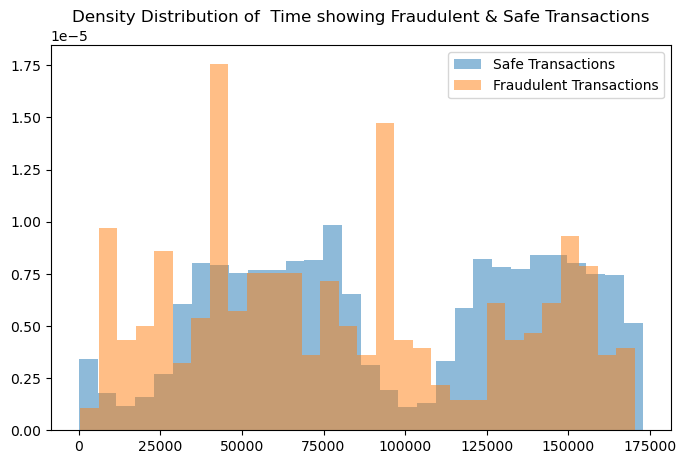

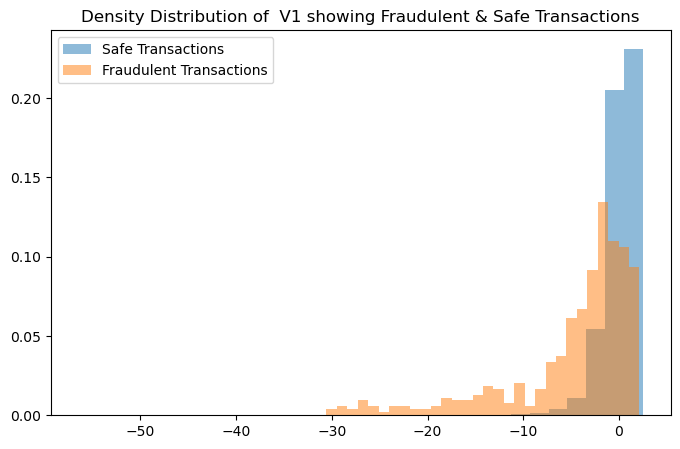

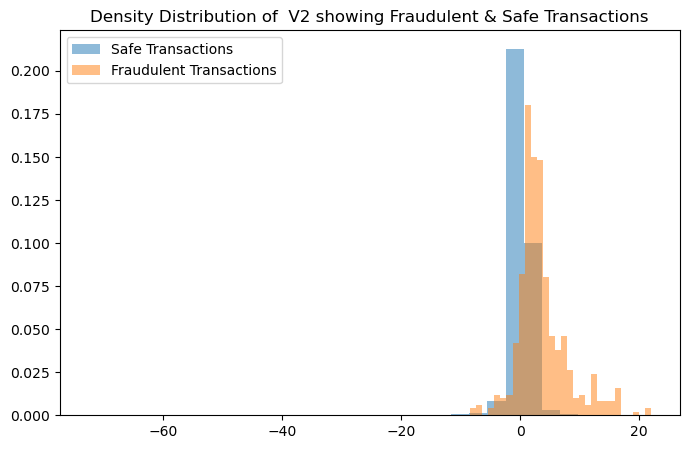

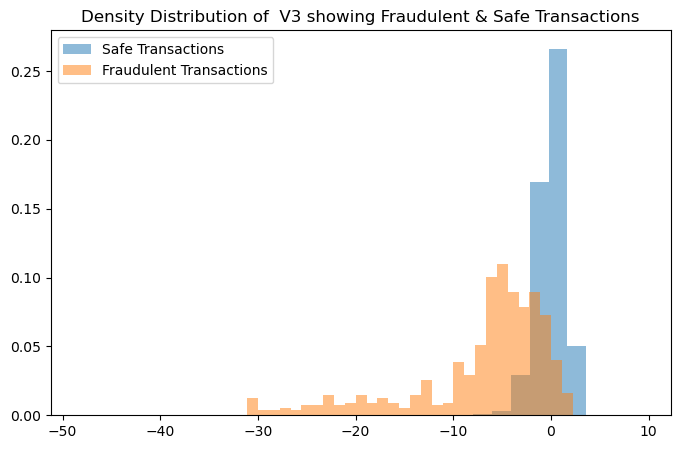

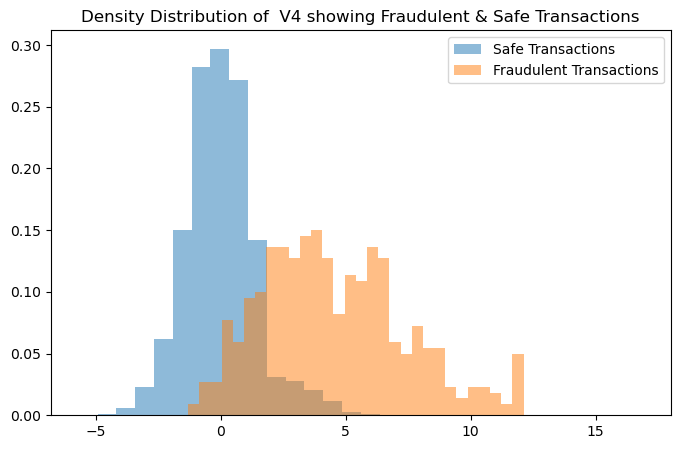

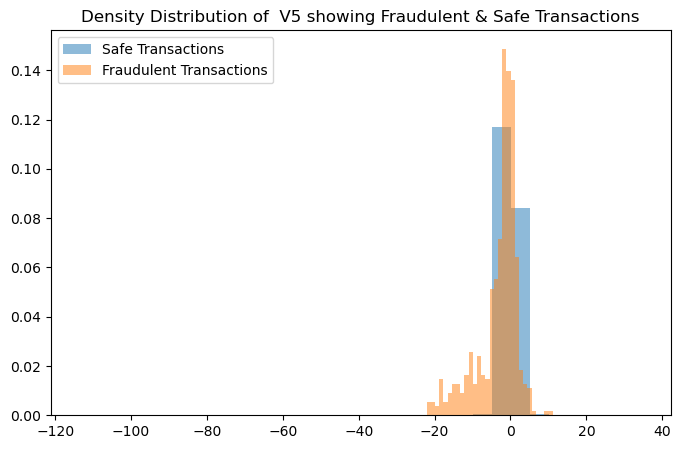

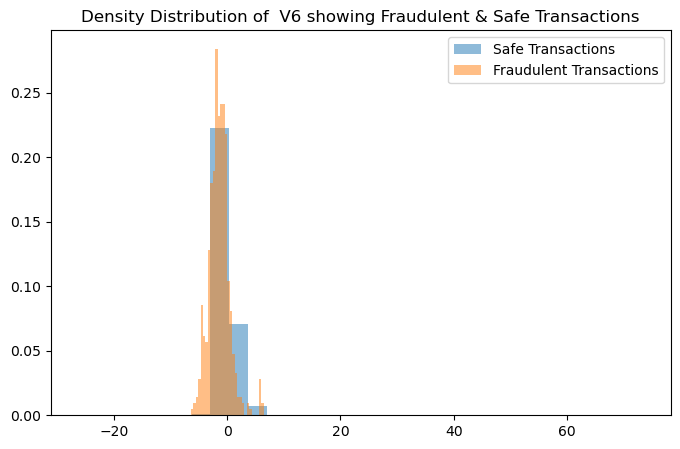

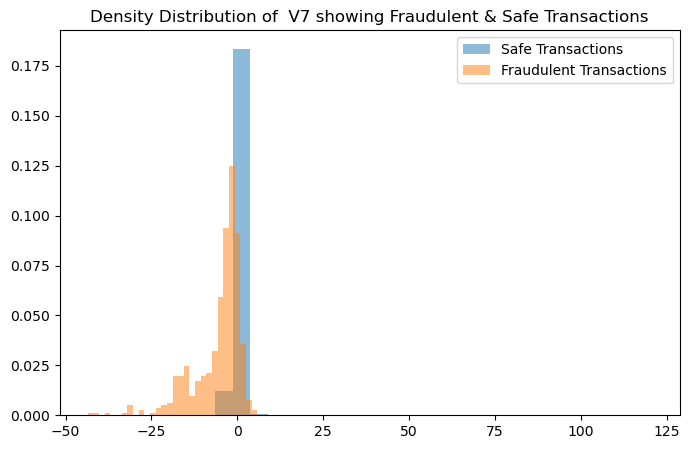

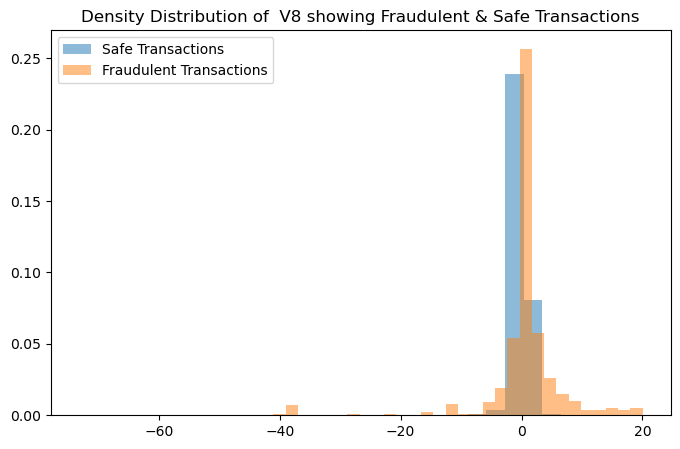

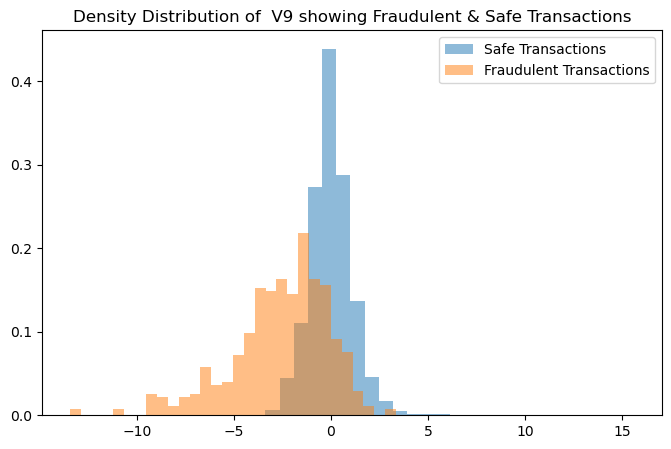

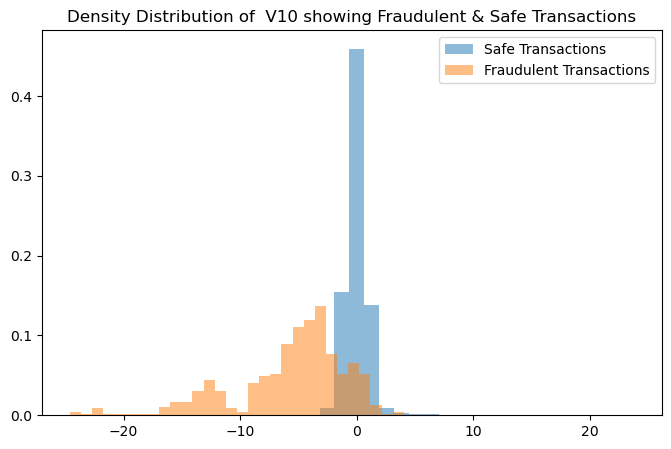

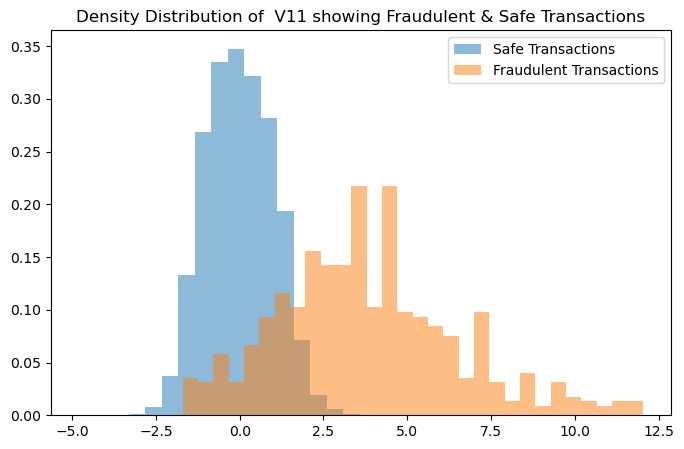

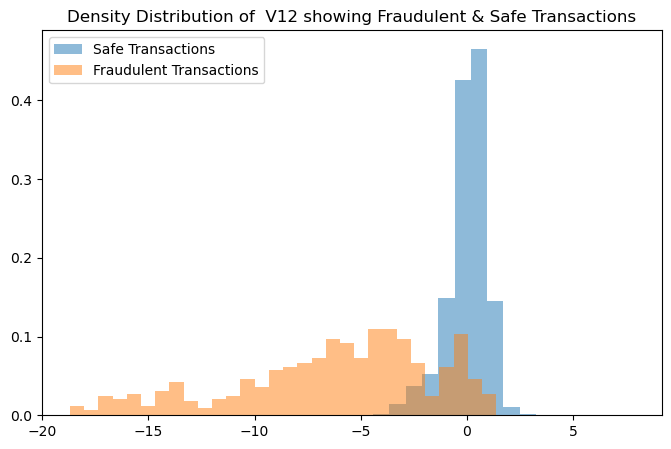

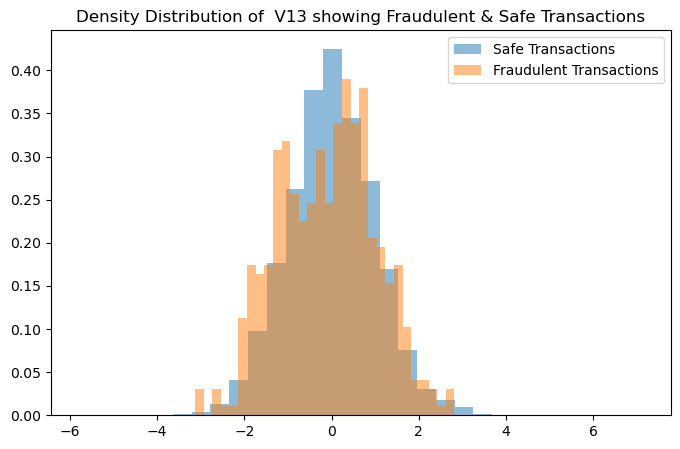

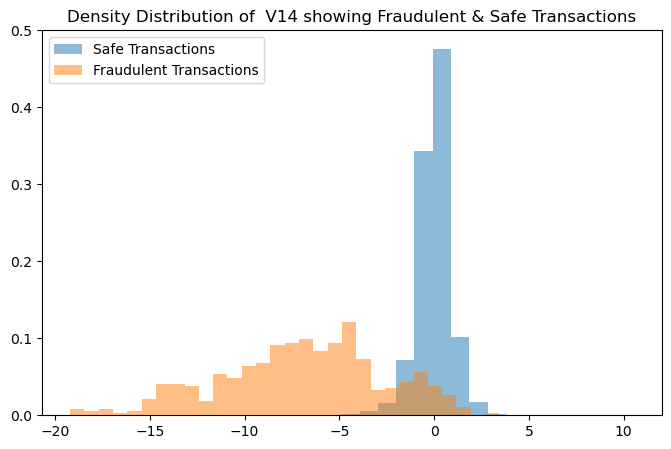

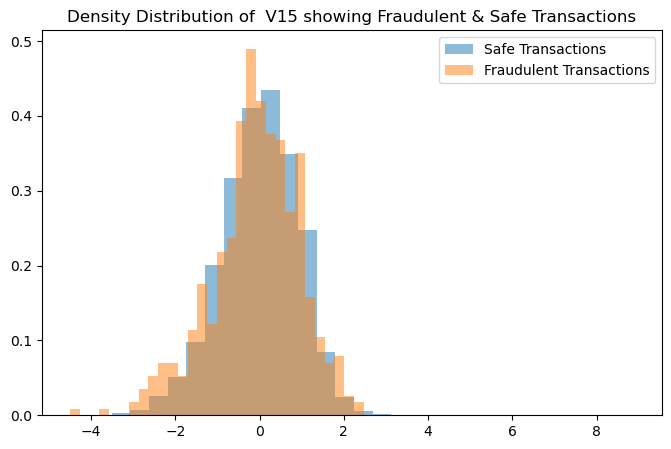

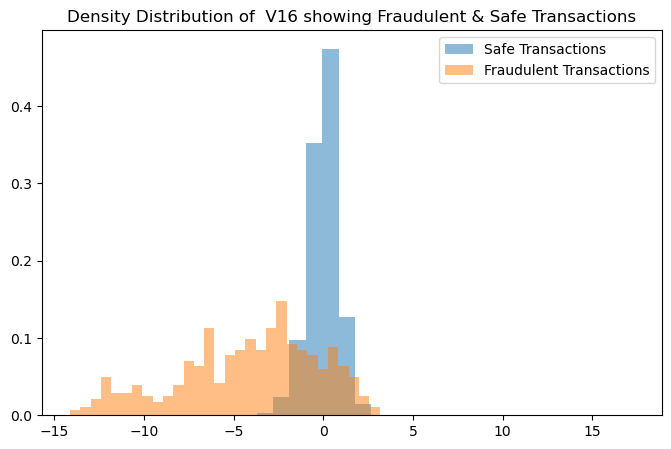

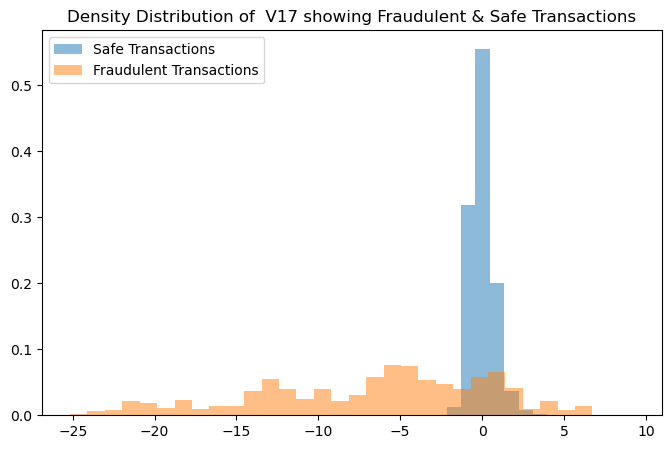

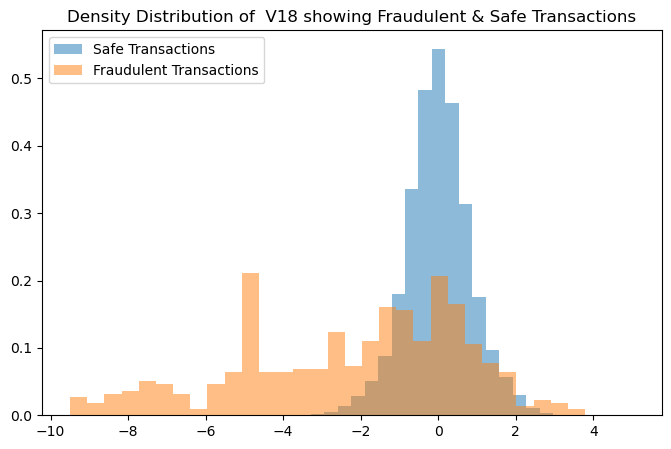

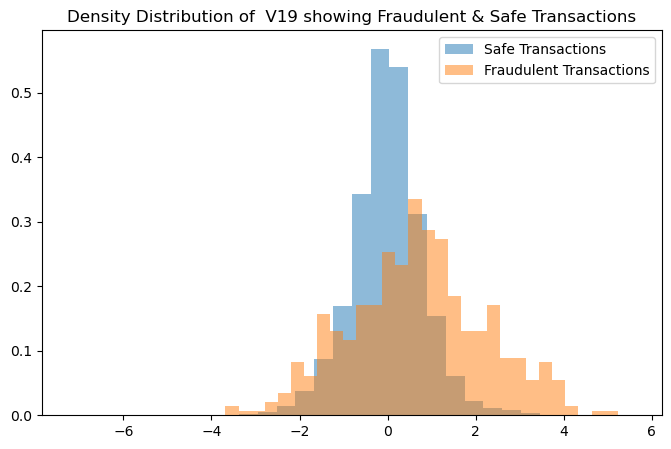

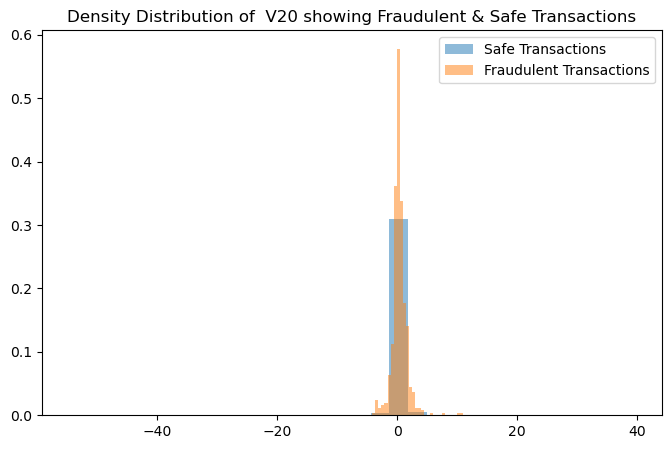

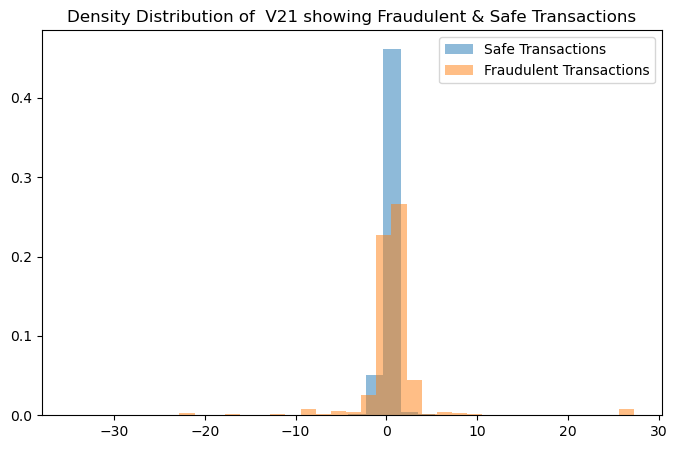

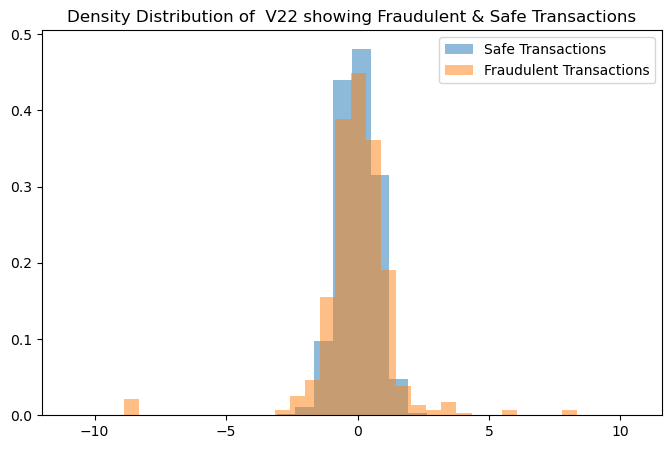

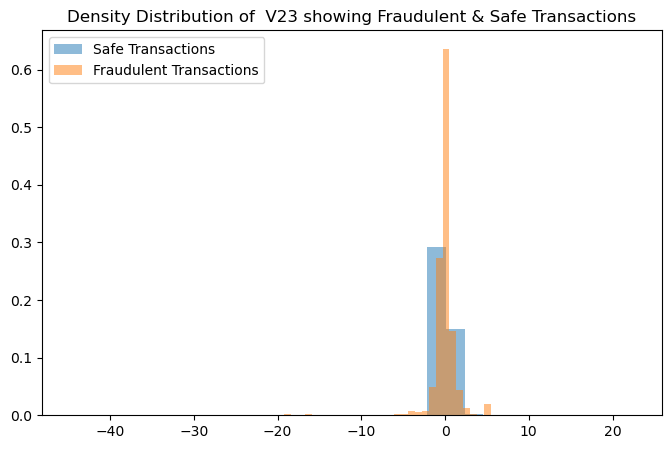

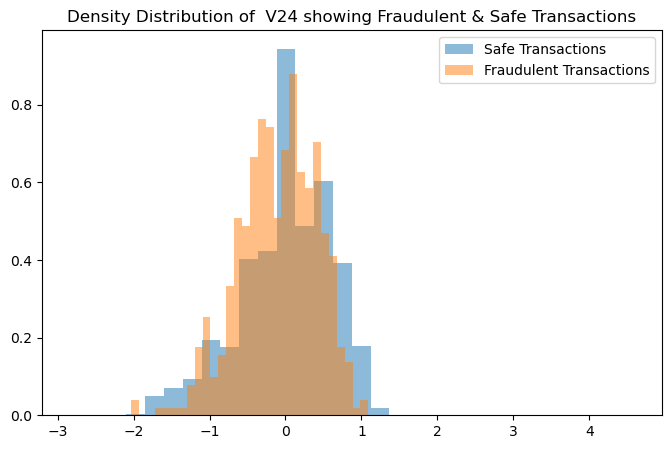

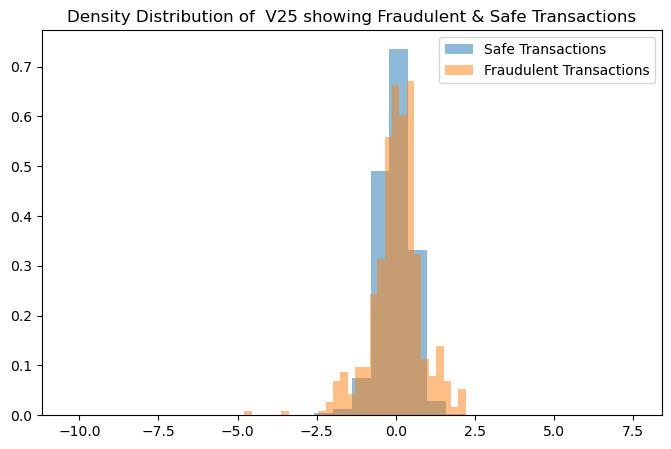

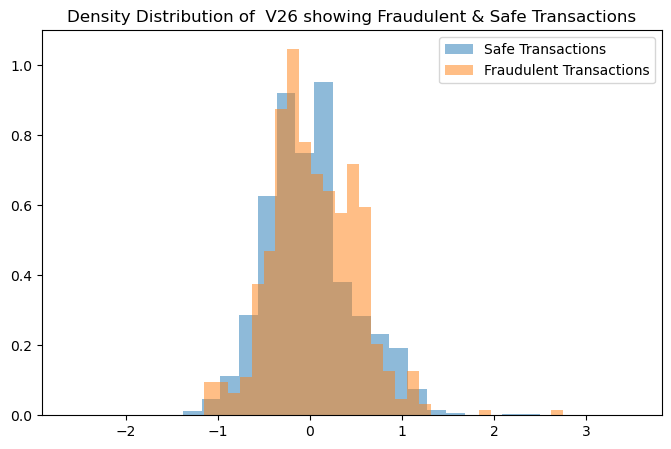

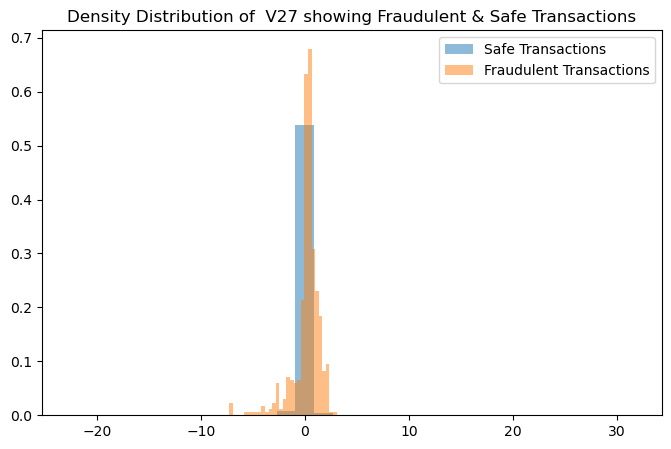

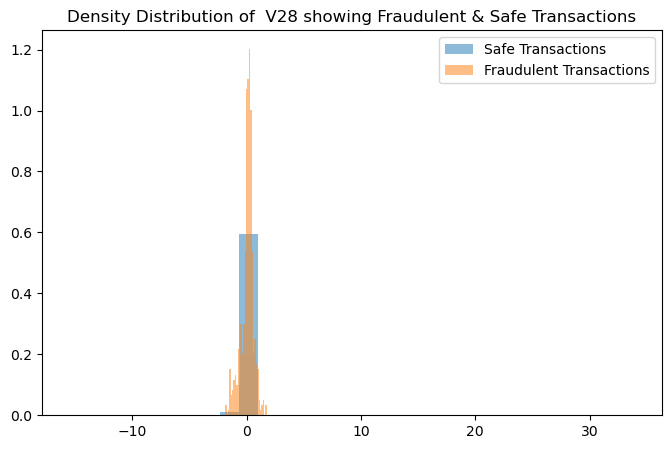

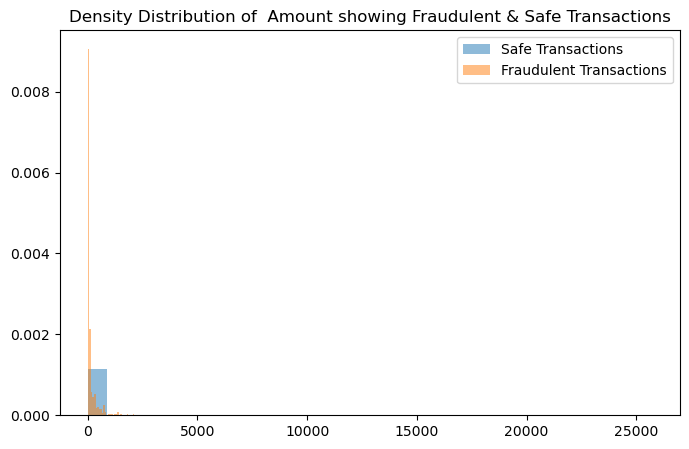

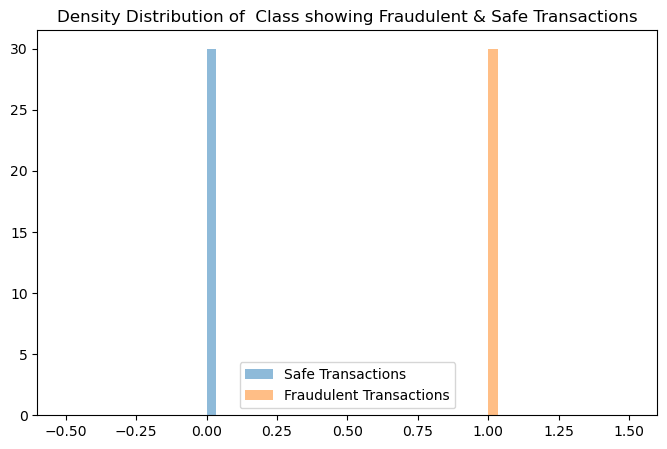

In [9]:
feats = df.columns

for ft in feats:
    plt.figure(figsize = (8,5))
    plt.hist(df.loc[df.Class == 0][ft], bins=30, alpha=0.5, density=True, label = 'Safe Transactions')
    plt.hist(df.loc[df.Class == 1][ft], bins=30, alpha=0.5, density=True, label = 'Fraudulent Transactions')
    plt.legend()
    plt.title(f'Density Distribution of  {ft} showing Fraudulent & Safe Transactions')
    plt.show();

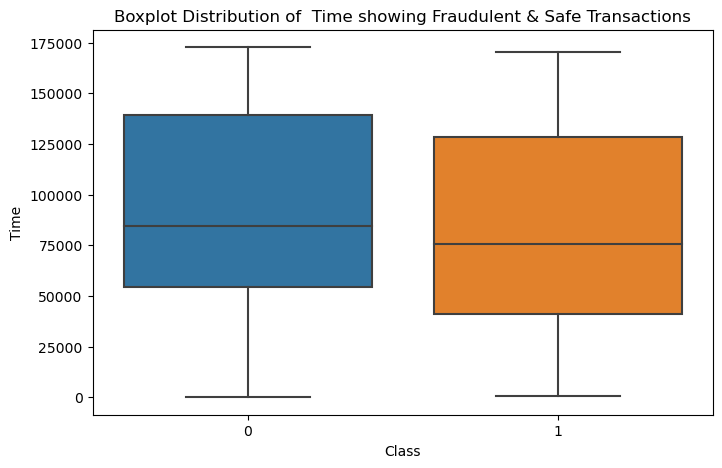

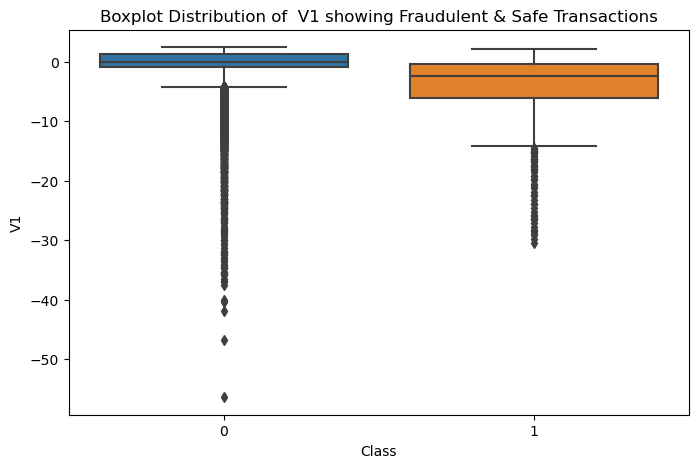

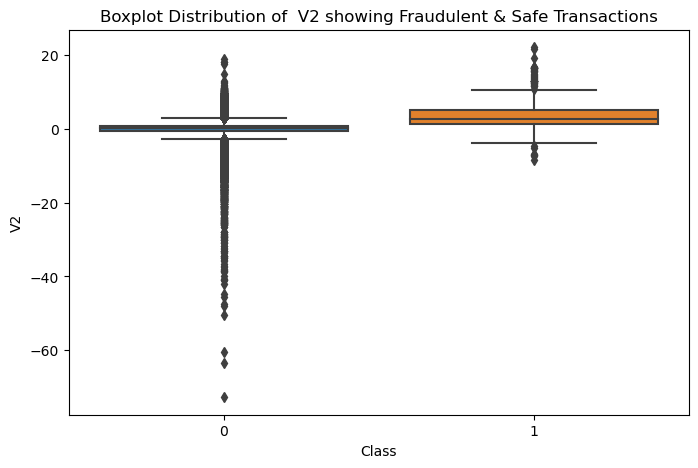

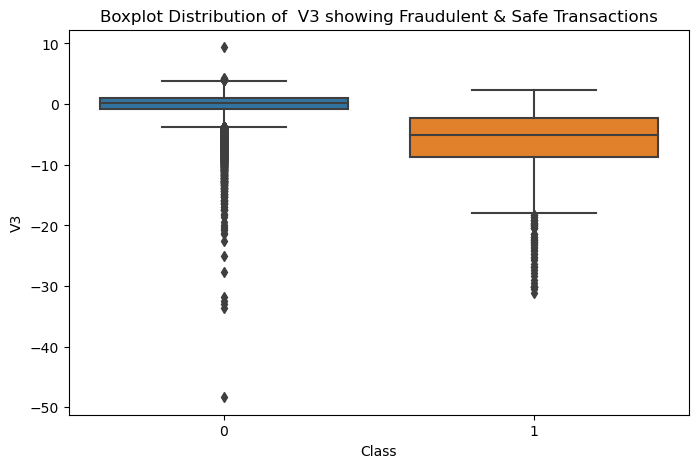

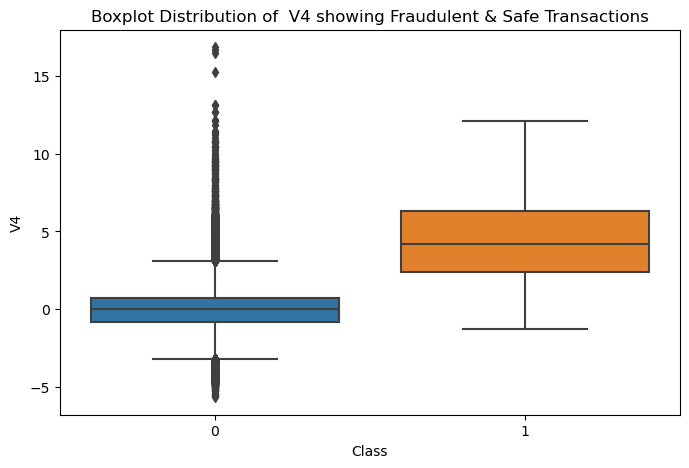

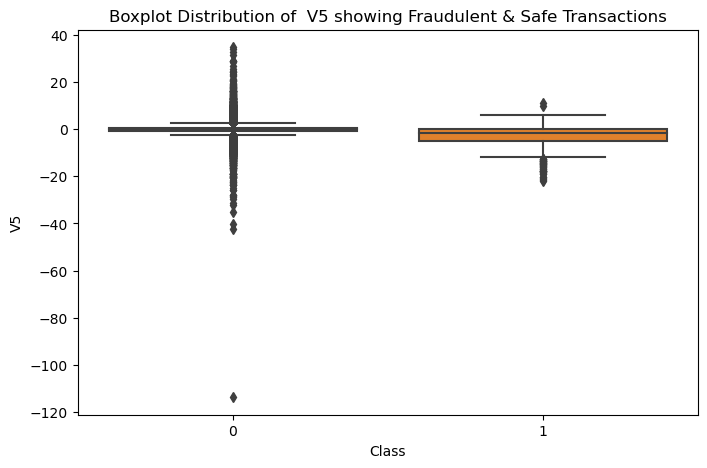

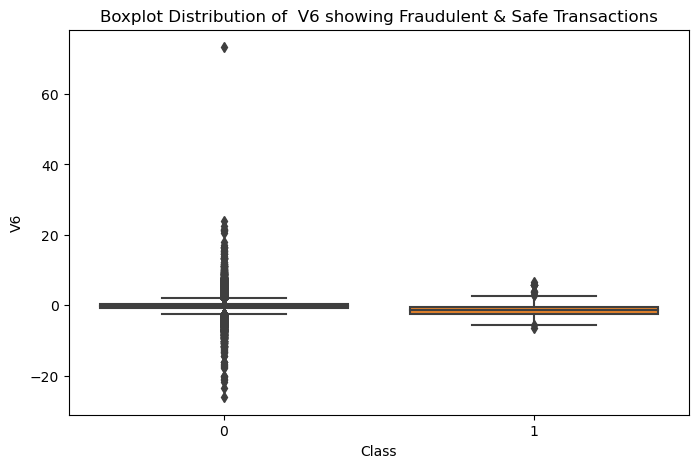

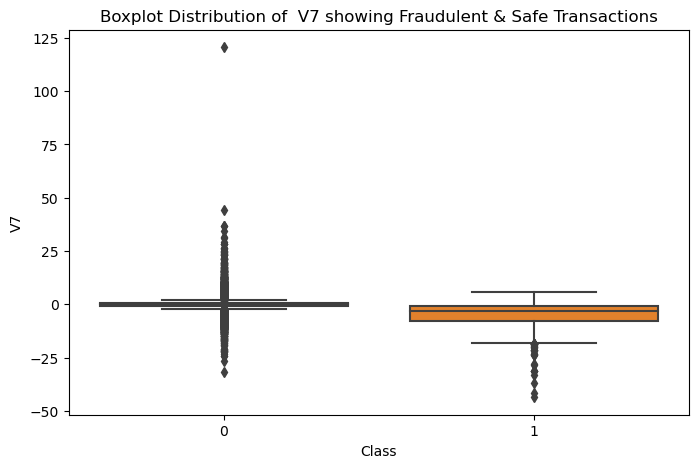

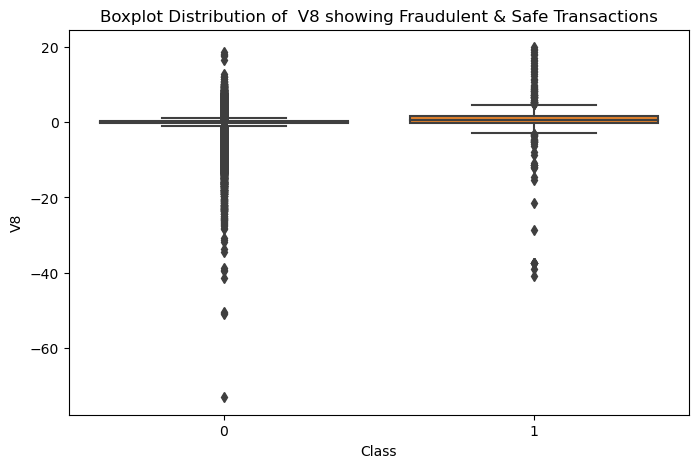

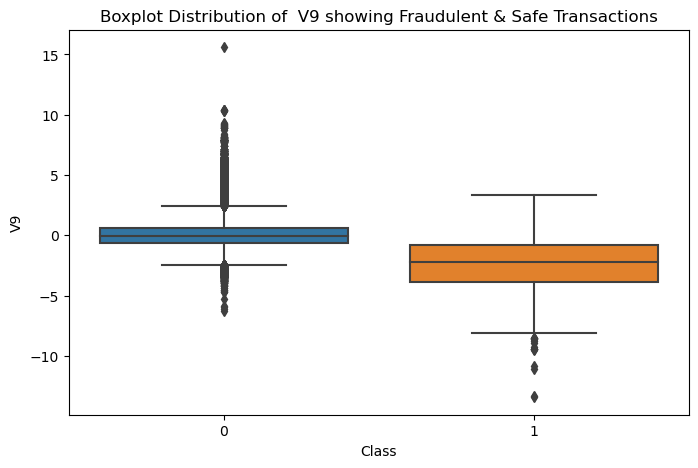

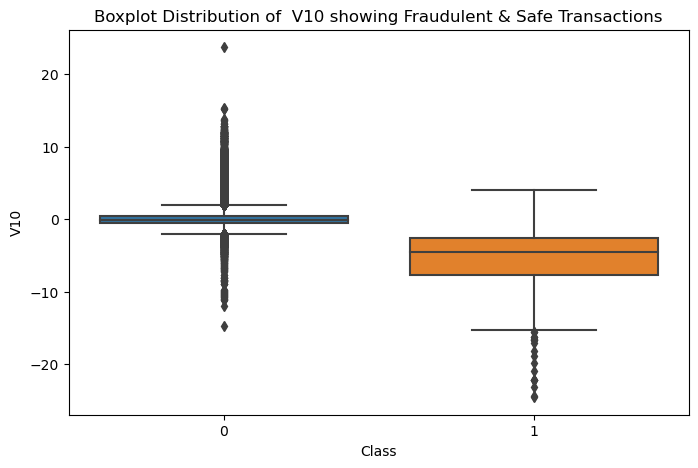

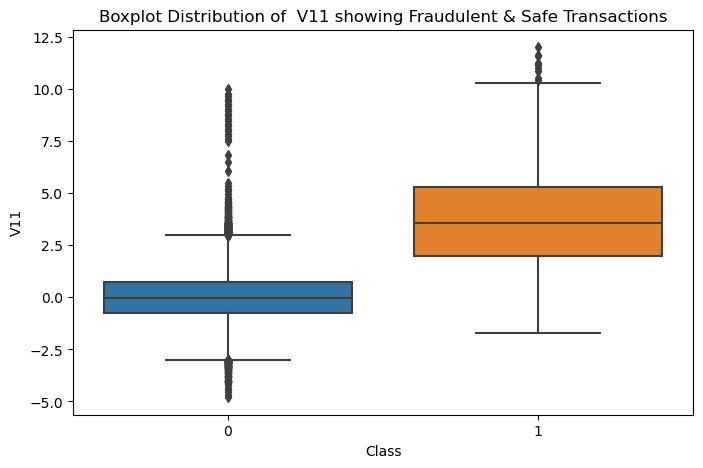

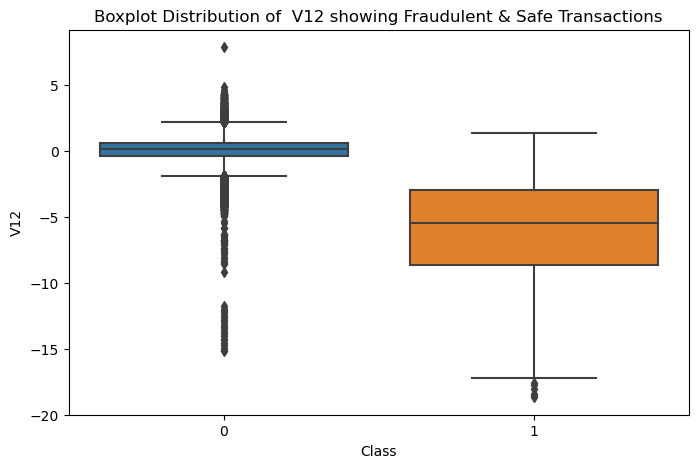

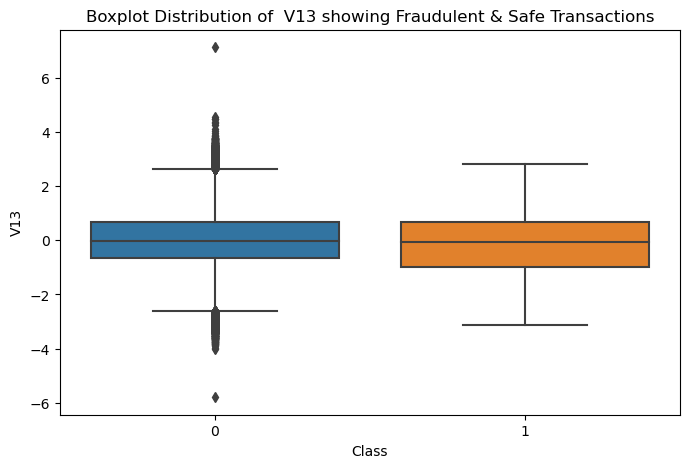

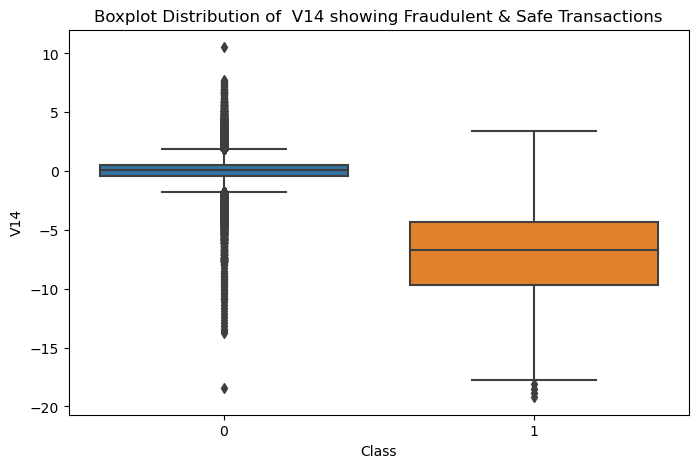

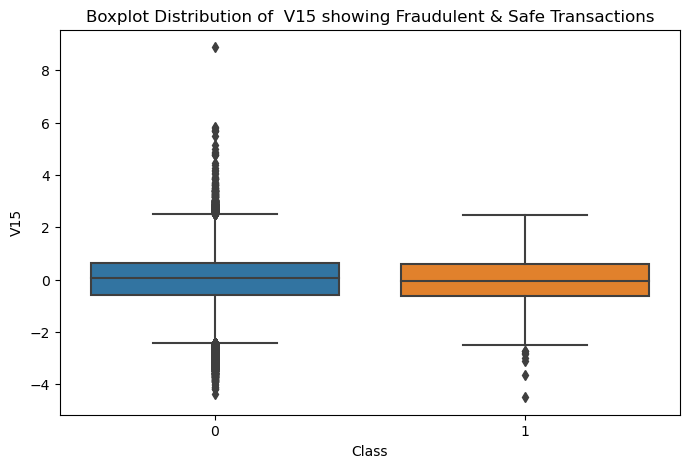

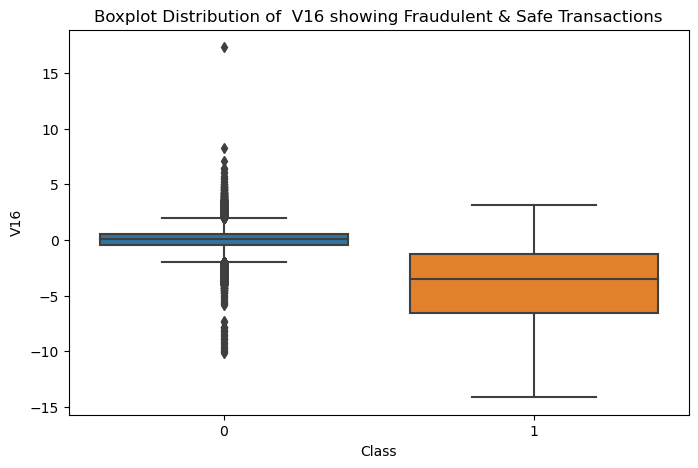

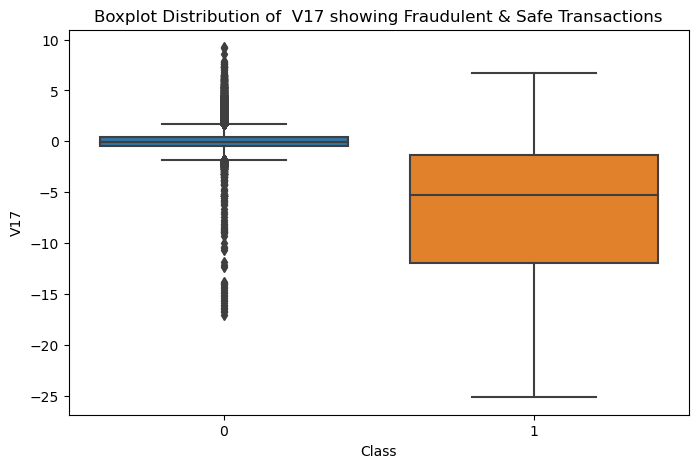

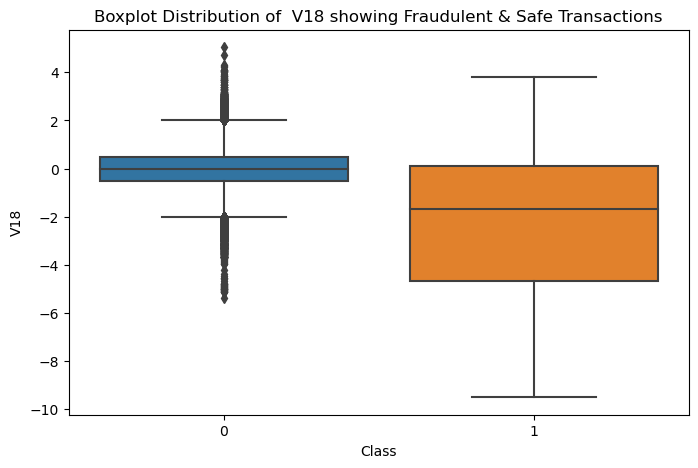

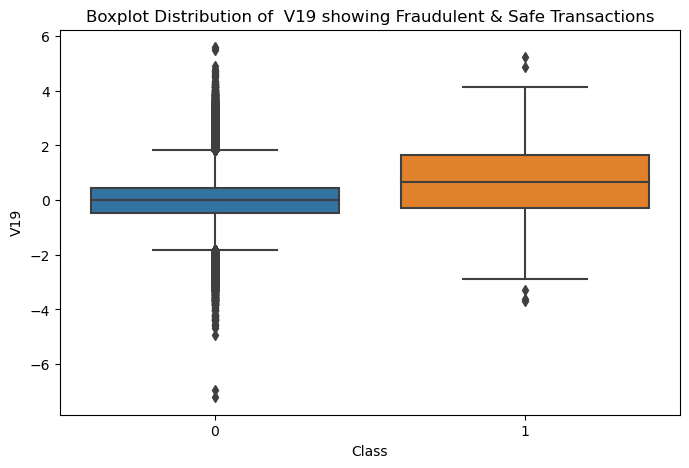

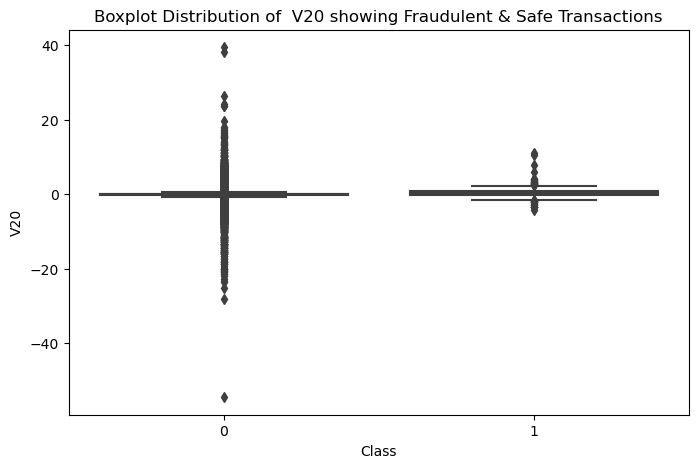

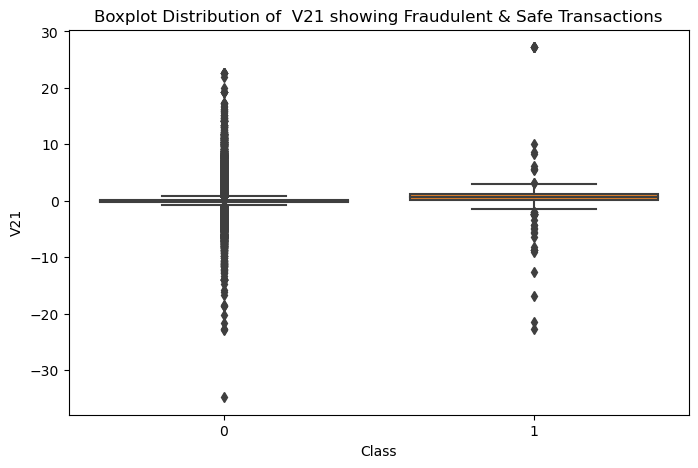

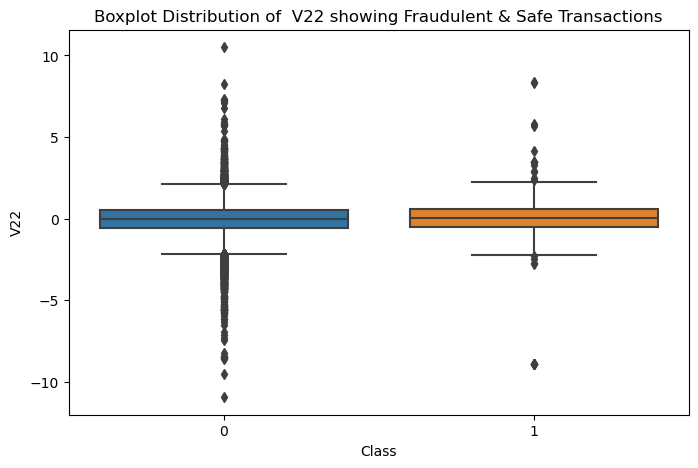

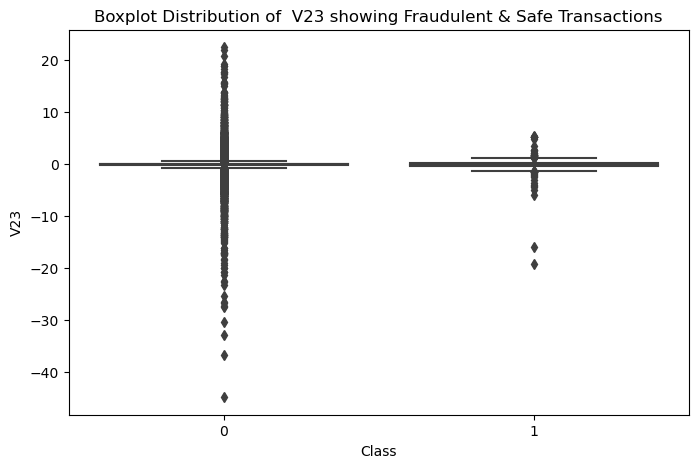

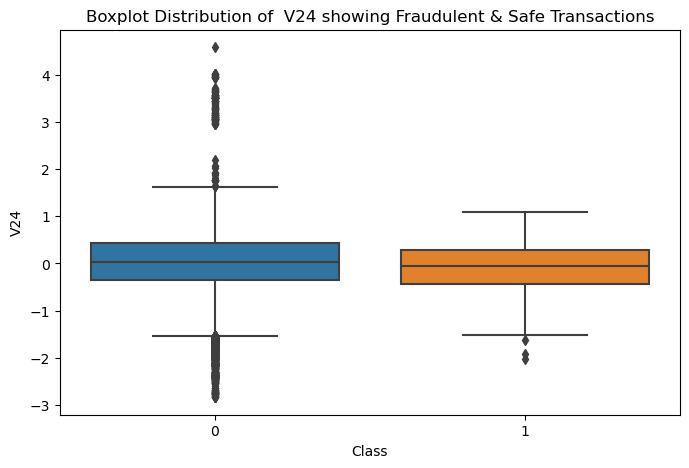

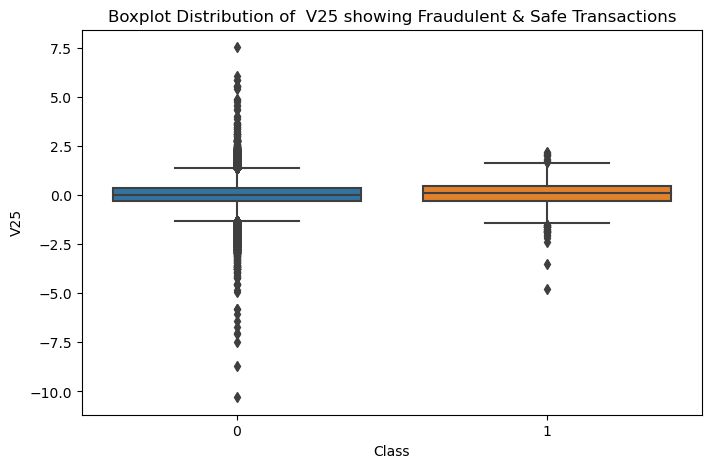

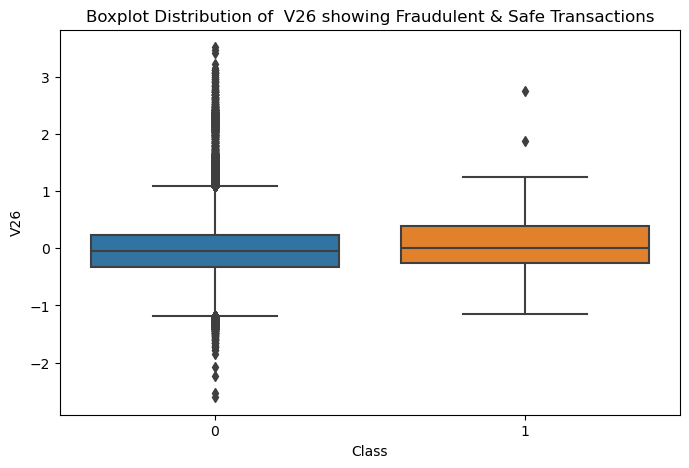

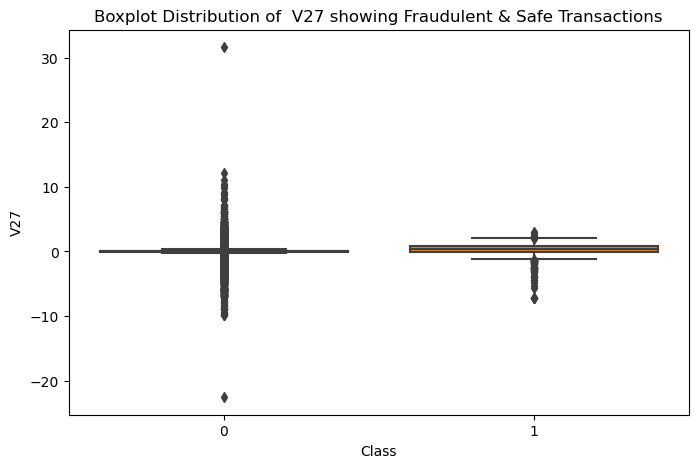

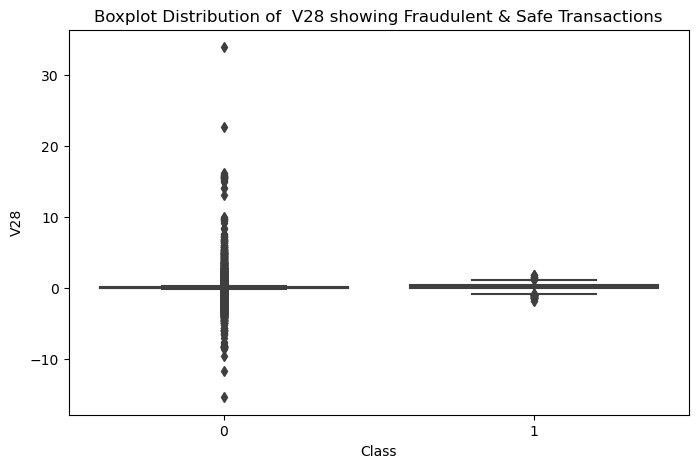

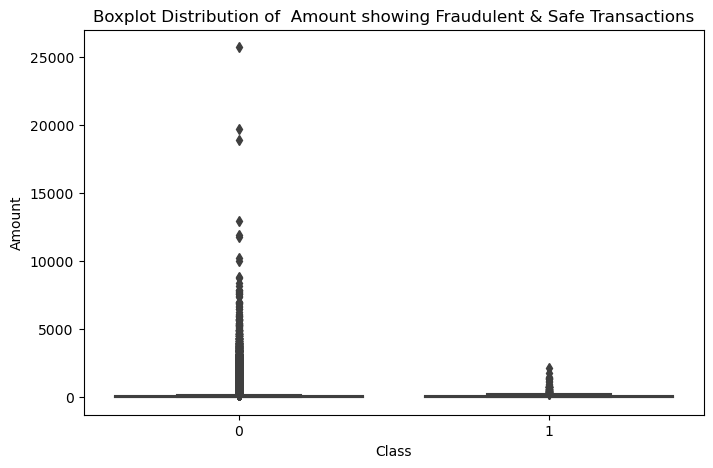

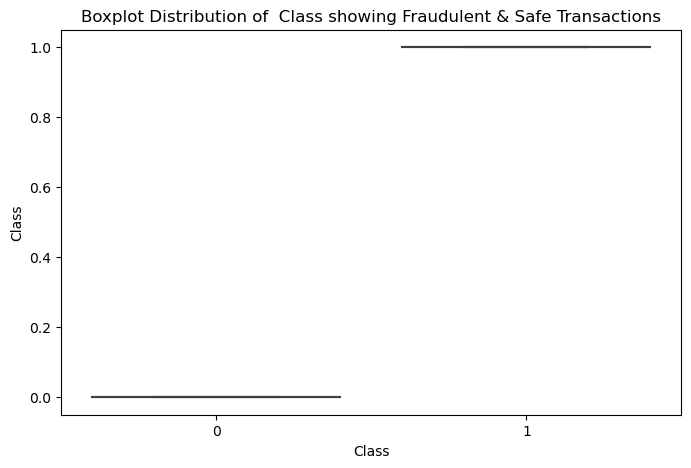

In [10]:
feats = df.columns

for ft in feats:
    plt.figure(figsize = (8,5))
    sns.boxplot(x=df['Class'], y=df[ft])
    plt.title(f'Boxplot Distribution of  {ft} showing Fraudulent & Safe Transactions')
    plt.show();

In [11]:
fraud = df.loc[df['Class'] == 1, :]
safe = df.loc[df['Class'] == 0, :]

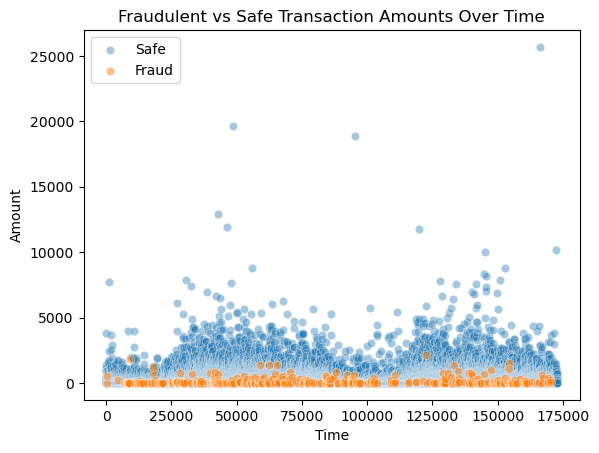

In [12]:
sns.scatterplot(x=df.Time, y=safe.Amount, alpha = 0.4, label='Safe')
sns.scatterplot(x=df.Time, y=fraud.Amount, alpha=0.5, label = 'Fraud')
plt.legend()
plt.title('Fraudulent vs Safe Transaction Amounts Over Time')
plt.show();

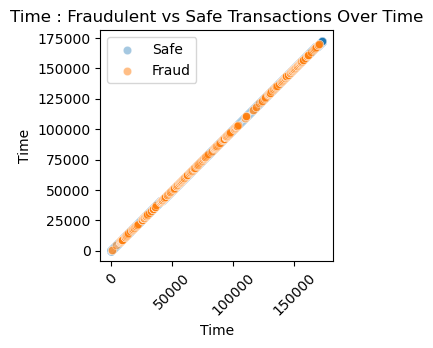

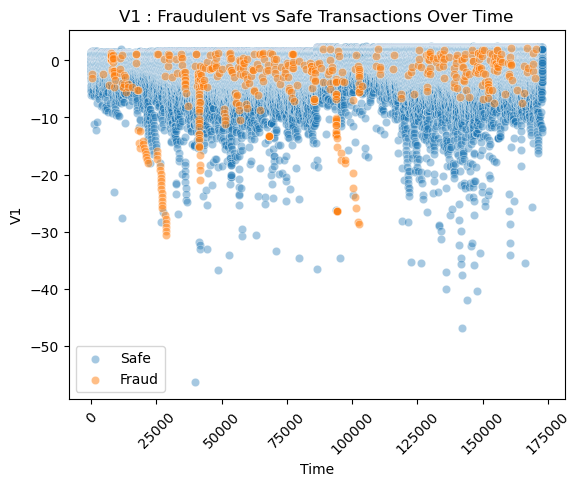

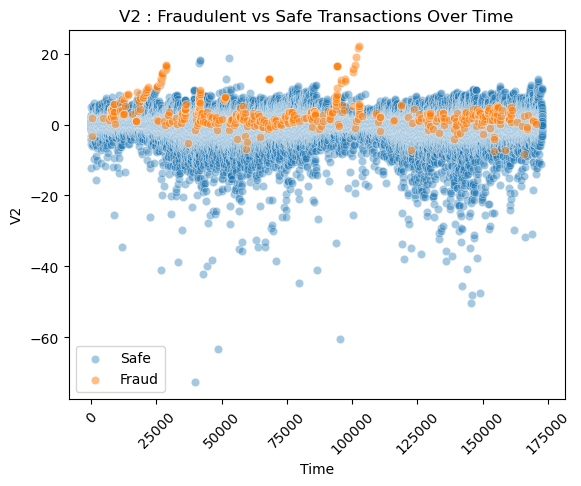

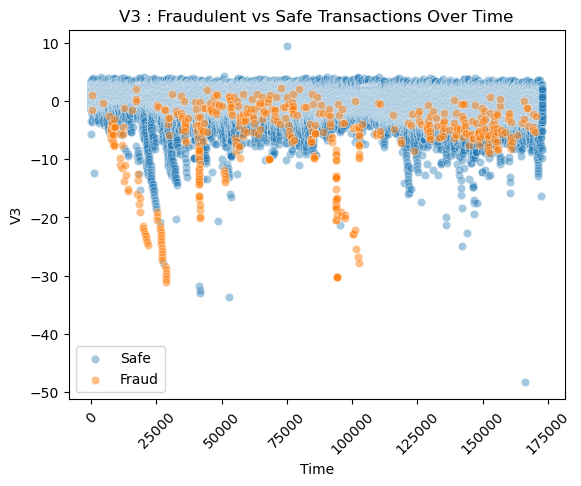

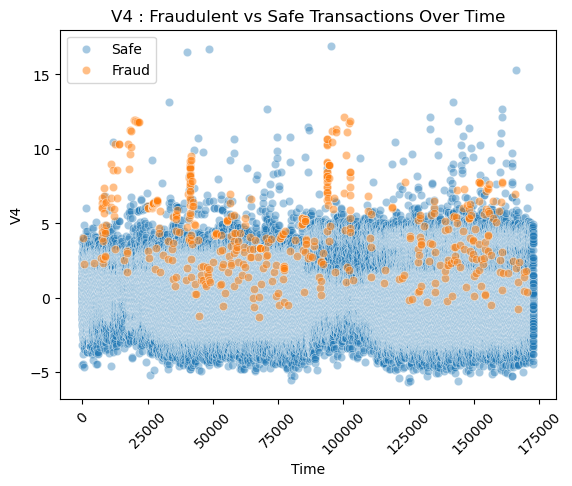

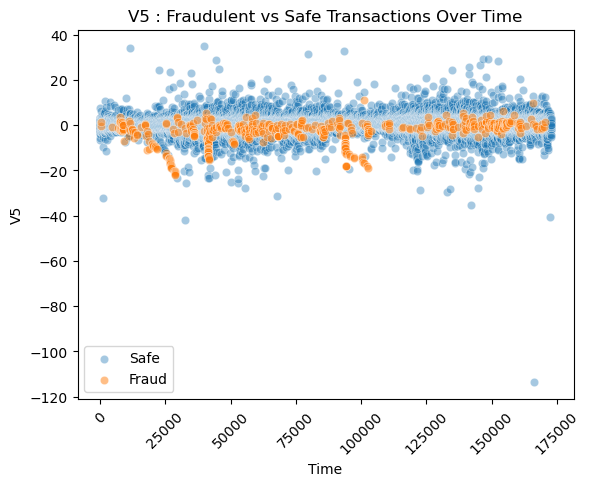

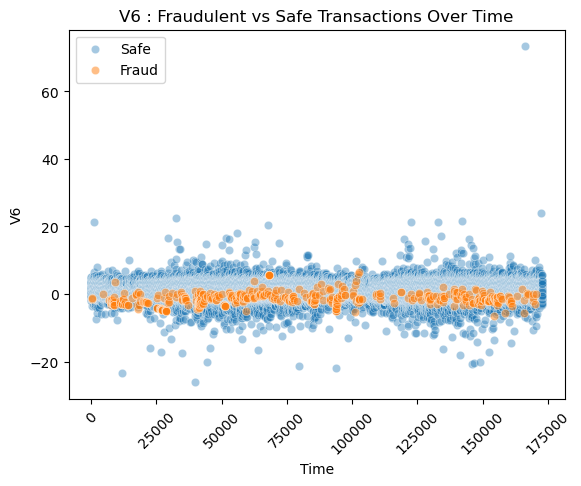

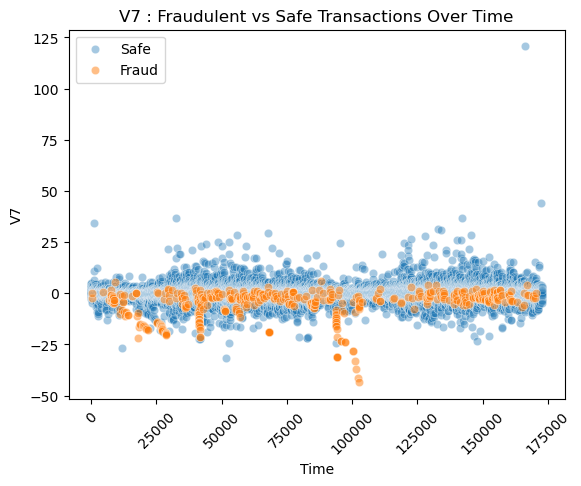

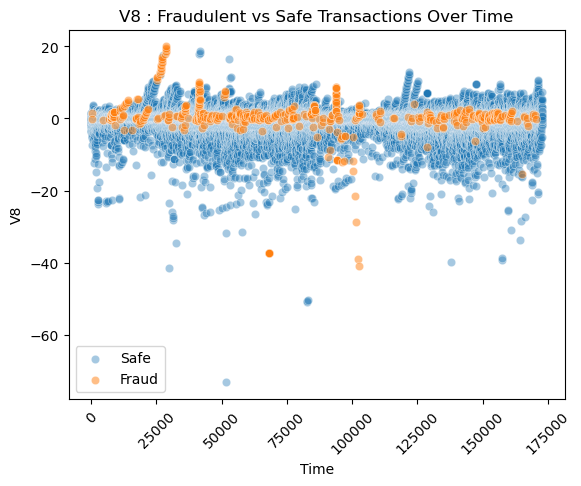

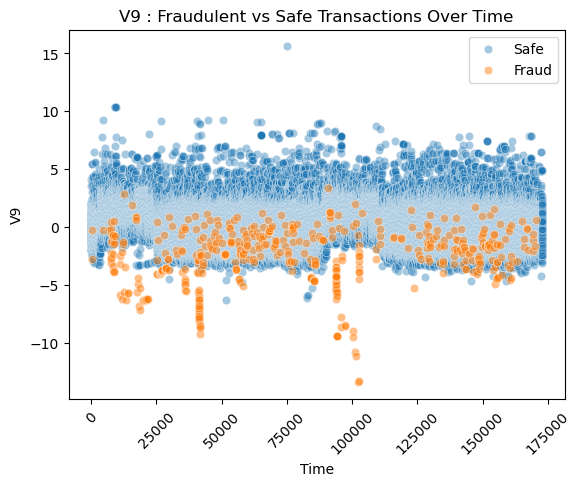

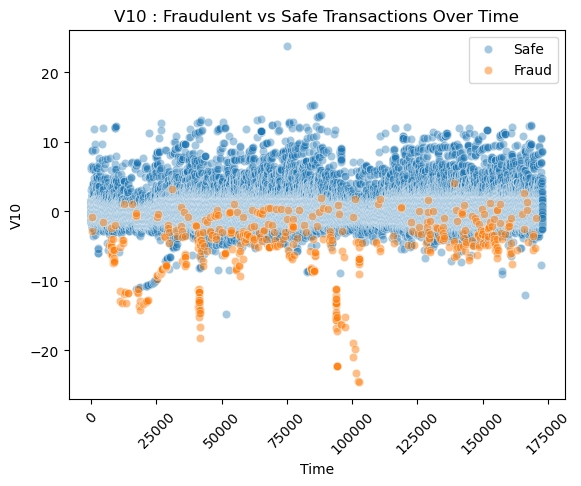

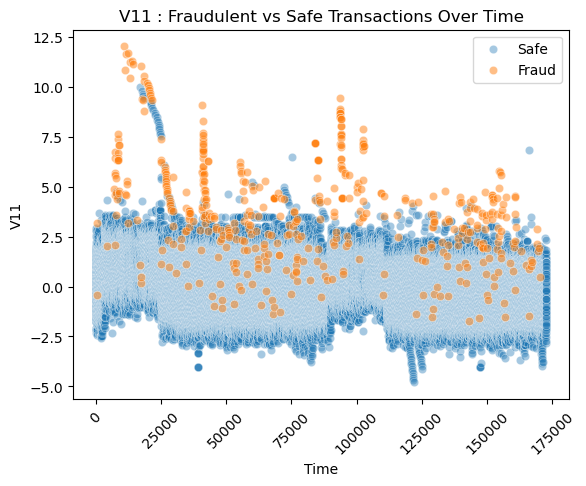

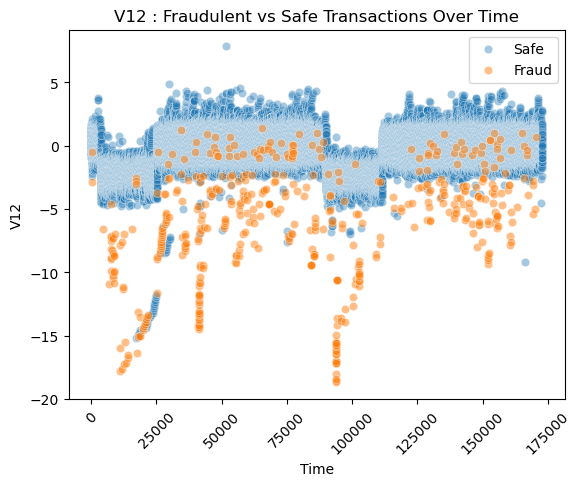

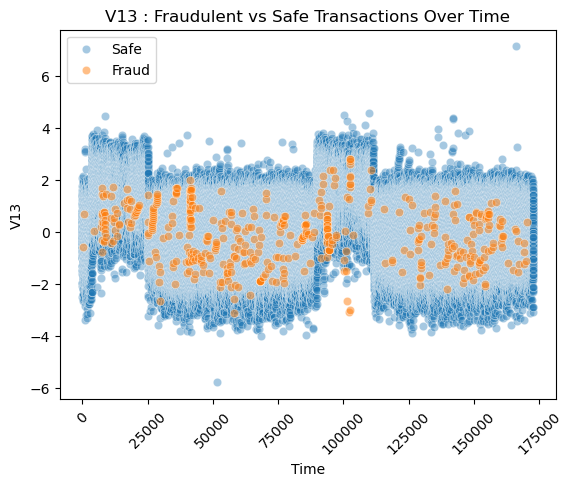

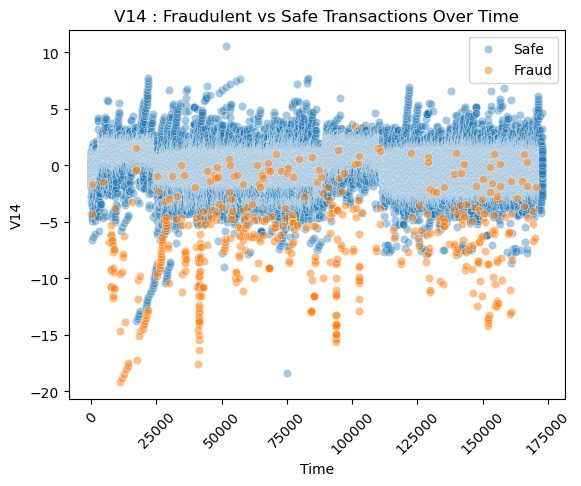

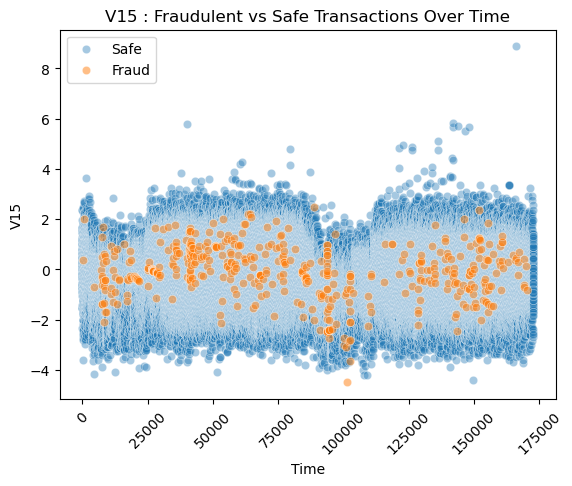

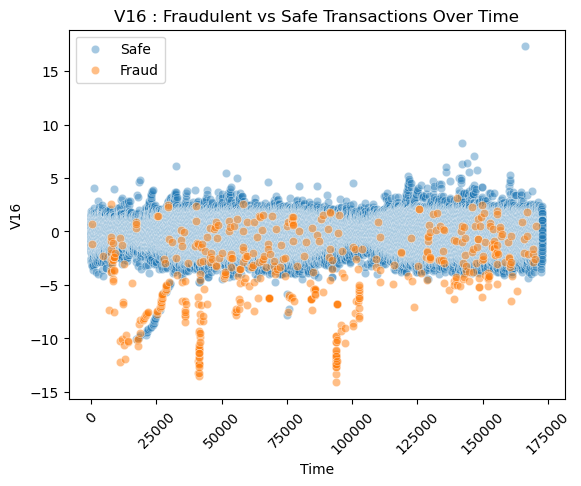

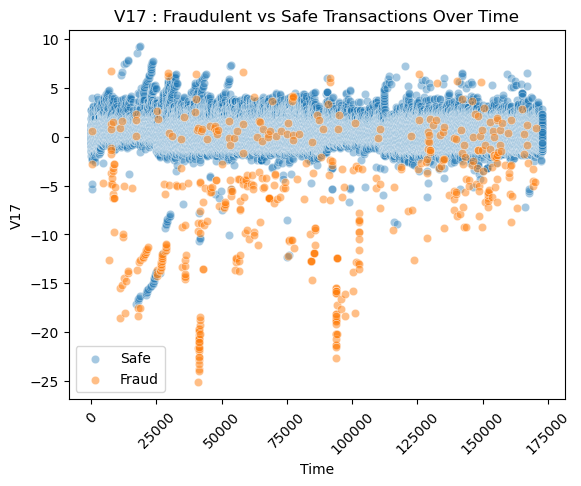

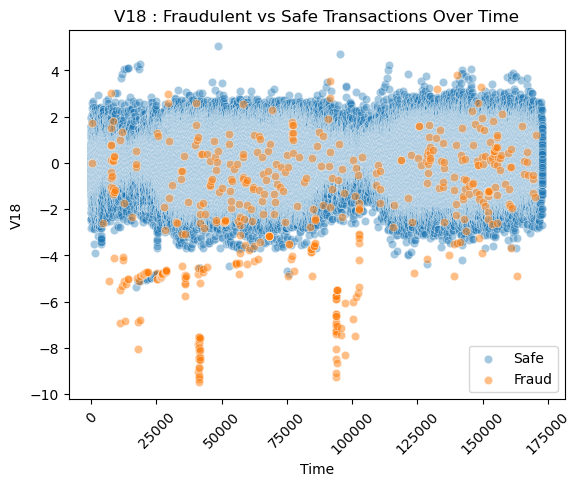

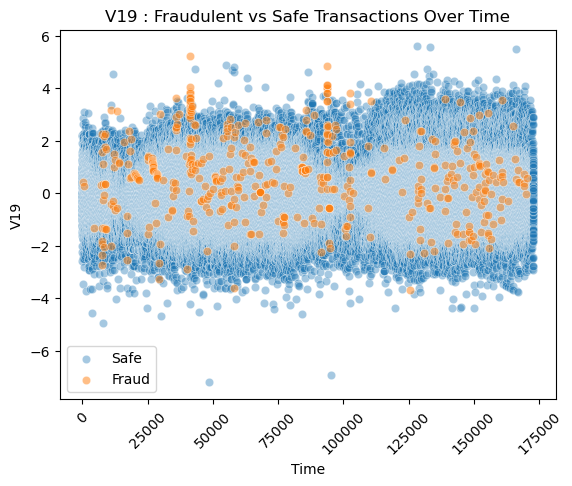

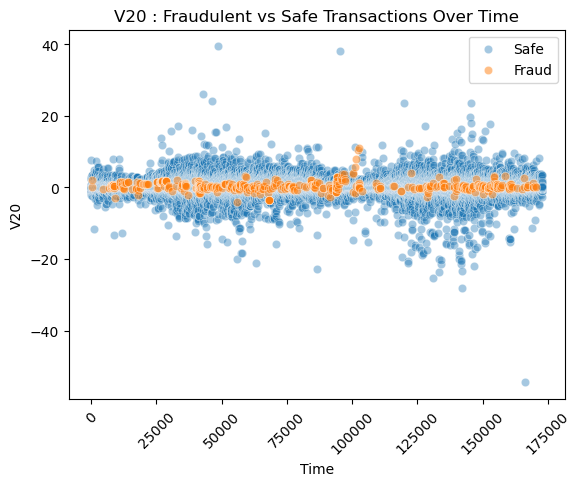

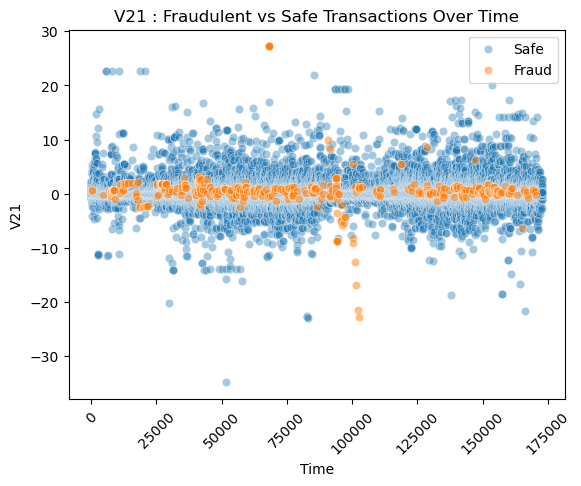

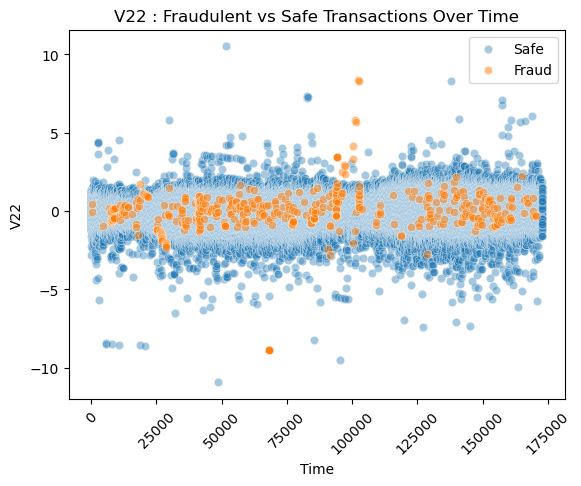

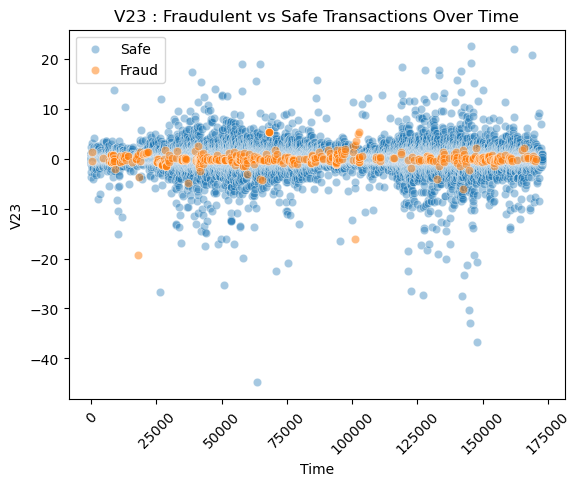

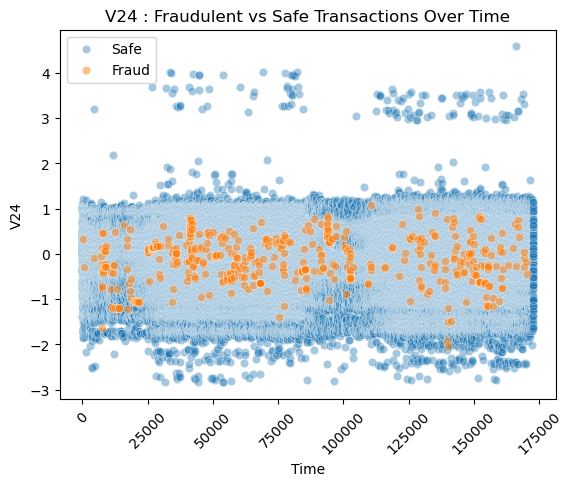

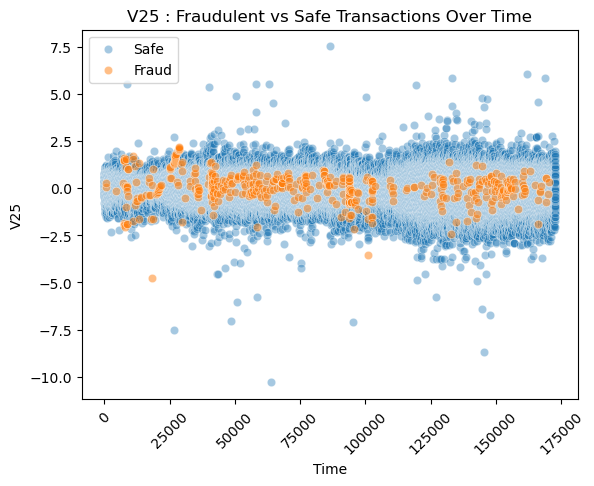

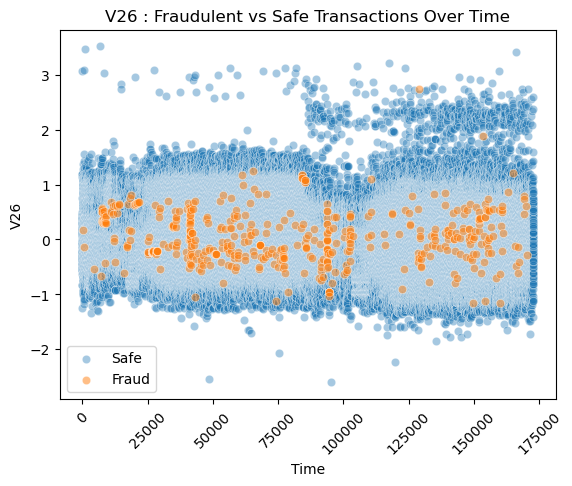

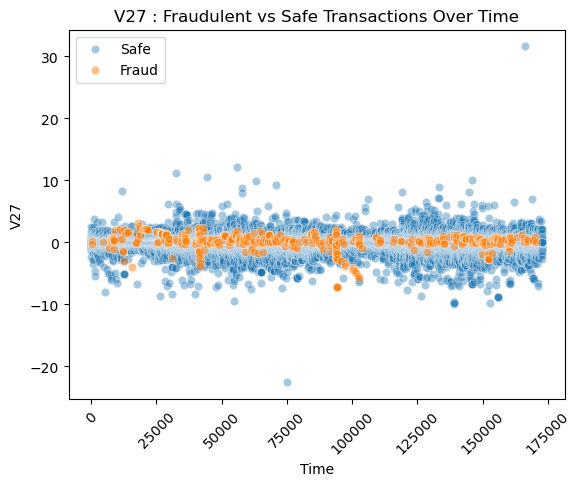

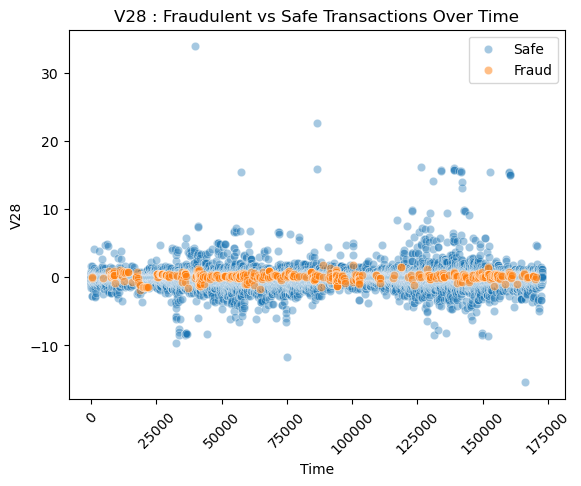

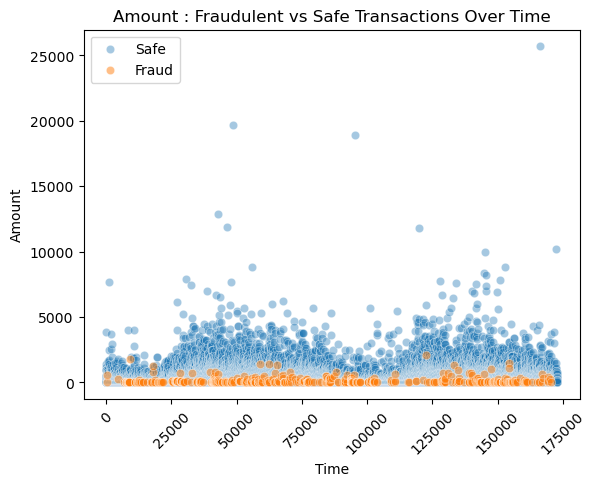

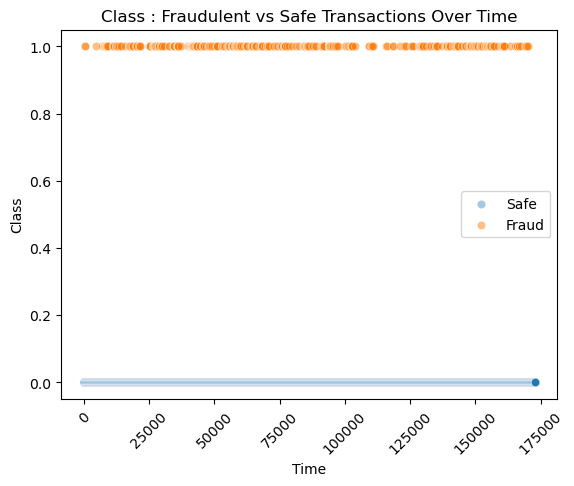

In [13]:
plt.figure(figsize=(3,3))
for x in df.columns:
    sns.scatterplot(x=df.Time, y=safe[x], alpha = 0.4, label='Safe')
    sns.scatterplot(x=df.Time, y=fraud[x], alpha=0.5, label = 'Fraud')
    plt.legend()
    plt.xticks(rotation=45)
    plt.title(f'{x} : Fraudulent vs Safe Transactions Over Time')
    plt.show();

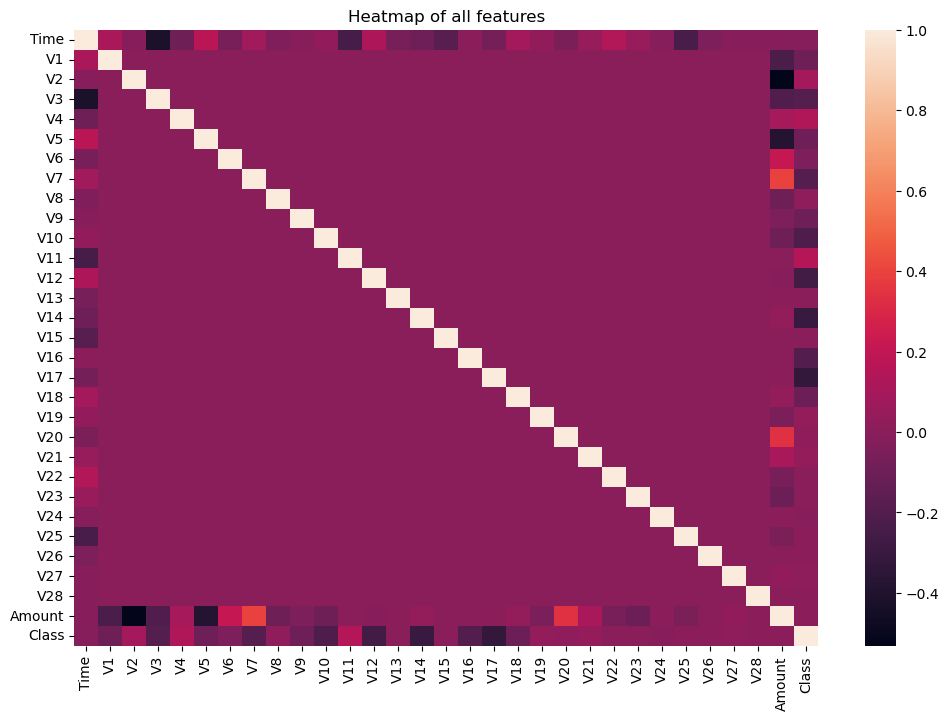

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
plt.title('Heatmap of all features')
plt.show();

### Features of note: 

V1: fraud exhibits longer leftside tail
V2: fraud exhibits longer rightside tail
V3: fraud dramatic leftside tail
V4: fraud framatic rightside tail
V7: fraud slight leftside tail
V9: Fraud dramatic leftside tail
v10: fraud dramatic leftside tail
v11: fraud dramatic rightside tail
v12: fraud dramatic leftside tail
v14: fraud dramatic leftside tail
v16: fraud flat left
v17: fraud flat
v18: fraud flat

In [15]:
X = df.drop(columns='Class')
y = df['Class']

In [16]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, stratify=y)

In [61]:
print(Xtr.shape)
print(Xte.shape)
print(ytr.shape)
print(yte.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


**************************************************
CLASSIFICATION REPORT
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.80      0.86       148

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



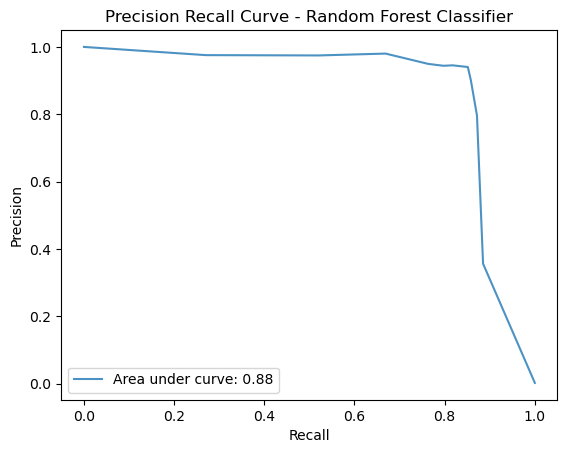

In [82]:
rfc = RandomForestClassifier(n_estimators = 10, class_weight = 'balanced_subsample')

rfc.fit(Xtr, ytr)
y_pred = rfc.predict(Xte)
y_prob = rfc.predict_proba(Xte)

cr = classification_report(yte, y_pred)
print('*'*50)
print('CLASSIFICATION REPORT')
print('*'*50)
print(cr)
prec, rec, pthresh = precision_recall_curve(yte, y_prob[:,1])
pr_auc = auc(rec, prec)

sns.lineplot(x = rec, y = prec, alpha = 0.8, label = f'Area under curve: {pr_auc:.2f}')
plt.title('Precision Recall Curve - Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show();

**************************************************
CLASSIFICATION REPORT
**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.66      0.75       148

    accuracy                           1.00     85443
   macro avg       0.94      0.83      0.88     85443
weighted avg       1.00      1.00      1.00     85443



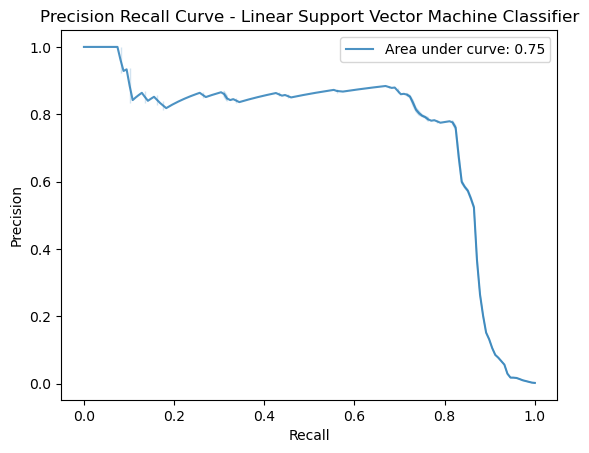

In [67]:
svc = LinearSVC(dual = 'auto', class_weight='balanced', max_iter=5000)

clf = CalibratedClassifierCV(svc)

clf.fit(Xtr, ytr)
y_pred = clf.predict(Xte)
y_prob = clf.predict_proba(Xte)

cr = classification_report(yte, y_pred)
print('*'*50)
print('CLASSIFICATION REPORT')
print('*'*50)
print(cr)
prec, rec, pthresh = precision_recall_curve(yte, y_prob[:,1])
pr_auc = auc(rec, prec)

sns.lineplot(x = rec, y = prec, alpha = 0.8, label = f'Area under curve: {pr_auc:.2f}')
plt.title('Precision Recall Curve - Linear Support Vector Machine Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show();

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103608 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016991 -> initscore=-4.057934
[LightGBM] [Info] Start training from score -4.057934
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

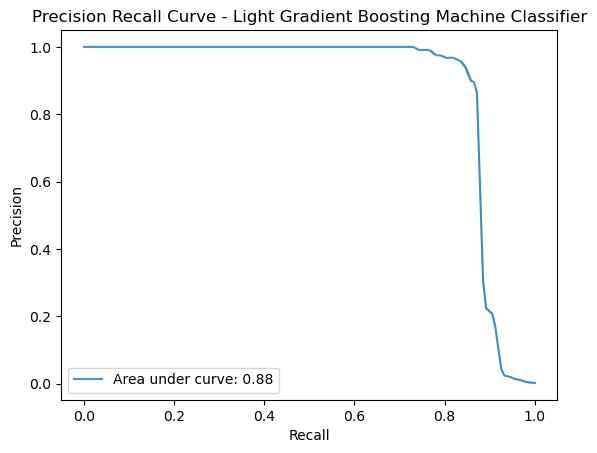

In [72]:
lgbm = lgb.LGBMClassifier(objective='binary',class_weight={0: 1.0, 1: 10.0},n_estimators=500)

lgbm.fit(Xtr, ytr)
y_pred = lgbm.predict(Xte)
y_prob = lgbm.predict_proba(Xte)

cr = classification_report(yte, y_pred)
print('*'*50)
print('CLASSIFICATION REPORT')
print('*'*50)
print(cr)
prec, rec, pthresh = precision_recall_curve(yte, y_prob[:,1])
pr_auc = auc(rec, prec)

sns.lineplot(x = rec, y = prec, alpha = 0.8, label = f'Area under curve: {pr_auc:.2f}')
plt.title('Precision Recall Curve - Light Gradient Boosting Machine Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show();

In [36]:
#Rolling with the random forest, optimizing...

In [62]:
rfc = RandomForestClassifier()

rfcgrid = RandomizedSearchCV()

KeyboardInterrupt: 